In [13]:
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [14]:
path_netflix_df = Path("Resources/cleaned_netflix_df.csv")
cleaned_netflix_df = pd.read_csv(path_netflix_df)
cleaned_netflix_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,7,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
4,8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...
7959,8801,Movie,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
7962,8805,Movie,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [15]:
# Split comma separated values
netflix_df = cleaned_netflix_df.assign(country=cleaned_netflix_df['country'].str.split(', ')).explode('country')

# Some values had , at the end still (for example, "United States," so replace those with nothing
netflix_df["country"] = netflix_df["country"].str.replace(",","")

netflix_df

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,7,Movie,United States,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,Ghana,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...
7959,8801,Movie,Jordan,"March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
7962,8805,Movie,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [16]:
# Find type = Movies
movie_type = netflix_df[(netflix_df["type"] == "Movie")]
movie_type

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
3,7,Movie,United States,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,Ghana,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,Burkina Faso,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
3,7,Movie,United Kingdom,"September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...
7959,8801,Movie,Jordan,"March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers"
7960,8802,Movie,United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers"
7961,8804,Movie,United States,"November 1, 2019",2009,R,"Comedies, Horror Movies"
7962,8805,Movie,United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies"


In [17]:
# Count how many Movies each country has produced
count_movie = movie_type.groupby(["country"])["type"].value_counts().sort_values(ascending=False).reset_index()
count_movie

,country,type,count
0,United States,Movie,2752
1,India,Movie,962
2,United Kingdom,Movie,534
3,Canada,Movie,319
4,France,Movie,303
...,...,...,...
113,Samoa,Movie,1
114,Kazakhstan,Movie,1
115,Jamaica,Movie,1
116,Slovakia,Movie,1


In [18]:
# Find type = TV Shows
tv_type = netflix_df[(netflix_df["type"] == "TV Show")]

tv_type

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
4,8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"
7,15,TV Show,United States,"September 22, 2021",2021,TV-MA,"TV Comedies, TV Dramas"
8,17,TV Show,Mexico,"September 22, 2021",2020,TV-MA,"Crime TV Shows, Spanish-Language TV Shows, TV ..."
...,...,...,...,...,...,...,...
7955,8797,TV Show,United States,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,France,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,South Korea,"September 13, 2018",2016,TV-Y7,Kids' TV
7955,8797,TV Show,Indonesia,"September 13, 2018",2016,TV-Y7,Kids' TV


In [19]:
# Count how many TV Shows each country has produced
count_tv = tv_type.groupby(["country"])["type"].value_counts().sort_values(ascending=False).reset_index()
count_tv

,country,type,count
0,United States,TV Show,932
1,United Kingdom,TV Show,271
2,Japan,TV Show,197
3,South Korea,TV Show,170
4,Canada,TV Show,126
...,...,...,...
61,Switzerland,TV Show,1
62,Hungary,TV Show,1
63,Malta,TV Show,1
64,Senegal,TV Show,1


# Netflix Library by Country

In [20]:
# Merge the two dataframes - movie count and tv count
# rename and remove columns for formatting
netflix_all = pd.merge(count_movie, count_tv, how="outer", on=["country"])
df = netflix_all.rename(columns = {"count_x": "Movies Produced", "count_y": "TV Shows Produced", "country": "Country"}, inplace=True)
netflix_final = netflix_all.drop(columns = {"type_x", "type_y"})

# Replace NaN values with 0, if a country never produced a movie or tv show
netflix_final["Movies Produced"] = netflix_final["Movies Produced"].replace(np.nan, 0)
netflix_final["TV Shows Produced"] = netflix_final["TV Shows Produced"].replace(np.nan, 0)

# Find the Total Produced column by summing Movies + TV shows columns
netflix_final["Total Produced"] = netflix_final["Movies Produced"] + netflix_final["TV Shows Produced"]
netflix_final = netflix_final.sort_values(by=["Total Produced"], ascending=False)

# Display columns as integers only, for formatting
netflix_final["Movies Produced"] = netflix_final["Movies Produced"].astype(int)
netflix_final["TV Shows Produced"] = netflix_final["TV Shows Produced"].astype(int)
netflix_final["Total Produced"] = netflix_final["Total Produced"].astype(int)

# Display DataFrame where country is not equal to "" value, one country had no name but wasn't a NaN value
netflix_final = netflix_final.loc[netflix_final["Country"]!="",:]

netflix_final

,Country,Movies Produced,TV Shows Produced,Total Produced
0,United States,2752,932,3684
1,India,962,84,1046
2,United Kingdom,534,271,805
3,Canada,319,126,445
4,France,303,90,393
...,...,...,...,...
97,Somalia,1,0,1
98,Ecuador,1,0,1
99,Ethiopia,1,0,1
100,Nicaragua,1,0,1


# Netflix Library Map

In [22]:
# Normalize the data to show a better scale
log = netflix_final.copy()
log["Total Produced (log scale)"] = np.log10(log["Total Produced"])

# Plot the figure
fig = px.choropleth(
    log, 
    color="Total Produced (log scale)", 
    locations="Country", 
    locationmode="country names",
    hover_data=["Total Produced"],
    title="Netflix Library Distribution by Country"
    )

fig.show()

# Top 10 Netflix Libaries by Country (Total Produced) 

In [10]:
netflix_final.head(10).reset_index(drop=True)

,Country,Movies Produced,TV Shows Produced,Total Produced
0,United States,2752,932,3684
1,India,962,84,1046
2,United Kingdom,534,271,805
3,Canada,319,126,445
4,France,303,90,393
5,Japan,119,197,316
6,Spain,171,61,232
7,South Korea,61,170,231
8,Germany,182,44,226
9,Mexico,111,58,169


# Top 10 Netflix Libraries Bar Chart

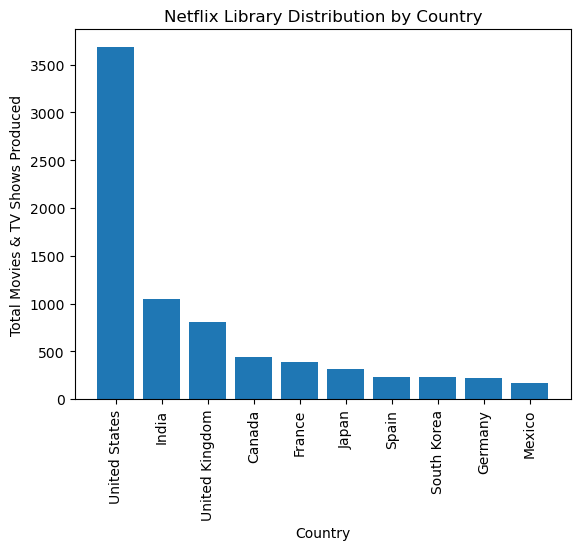

In [11]:
# Plotting a bar chart
netflix_slice = netflix_final.head(10)
x_axis = netflix_slice["Country"]
y_axis = netflix_slice["Total Produced"]

# Charting and setting labels
plt.bar(x_axis, y_axis, )
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation=90)
plt.xlabel("Country")
plt.ylabel("Total Movies & TV Shows Produced")
plt.title("Netflix Library Distribution by Country")
plt.show()